In [1]:
import pandas as pd
import numpy as np
import scipy.io

from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.colors as colors

C:\Users\irmew01\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [44]:
cntryname = ["AUS","AUT","BEL","CAN","DNK","FIN","FRA","DEU","GRC","ITA", "JPN", "NLD", "NZL","NOR","PRT","ESP","SWE","GBR","USA"]

df = pd.read_csv("./output/us-cross-section-ge.csv")

dflog = pd.read_csv("./output/us-cross-section-log.csv")

In [45]:
foo = pd.qcut(df.expenditure, 5,labels = False)

df["quantile-cut" ] = foo

dflog["quantile-cut" ] = foo 

grp = df.groupby("quantile-cut")

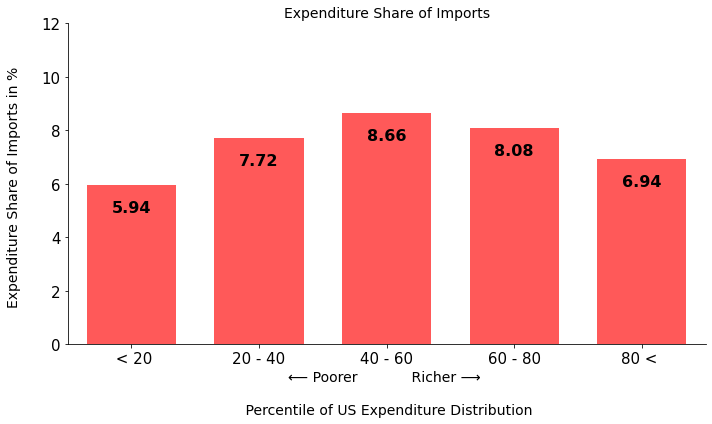

In [46]:
fig, ax = plt.subplots(figsize = [10.0,6], tight_layout = True)

hsr = ax.bar(grp.homeshare.median().index + 1, 
       100*(1 - grp.homeshare.mean()), alpha = 0.65, width = 0.70, color = "red")

ax.bar_label(hsr, round(100*(1-grp.homeshare.mean()),2),
                  padding=-30, color='black', fontweight='bold', fontsize = 16)

ax.set_xlim(.5,5.5)

ax.set_ylim(0,12)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title('Expenditure Share of Imports', fontsize=14)

ax.set_xlabel("⟵ Poorer            Richer ⟶ \n \n Percentile of US Expenditure Distribution", fontsize=14)
ax.set_ylabel("Expenditure Share of Imports in % \n", fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=15)

ax.xaxis.set_ticks(np.arange(1, 5+1, 1.0))

ax.xaxis.set_ticklabels([" < 20", "20 - 40", "40 - 60", "60 - 80", "80 < "])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.xaxis.set_ticks(np.arange(1, 5+1, 1.0))

plt.savefig("../notes/figures/expenditure-share.pdf", bbox_inches = "tight")

plt.show()

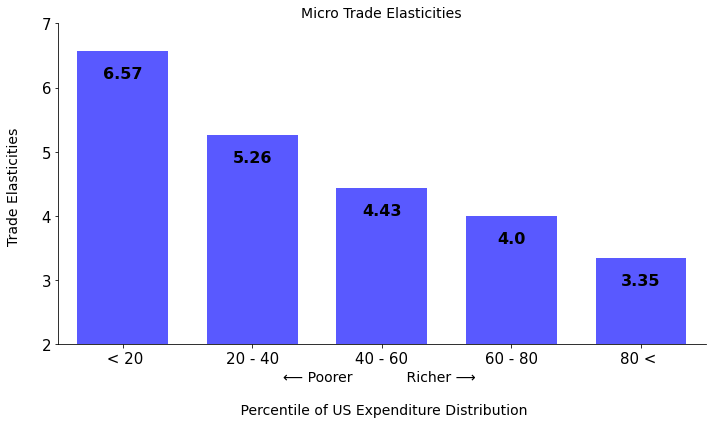

In [47]:
fig, ax = plt.subplots(figsize = [10.0,6.0], tight_layout = True)

hsr = ax.bar(grp.homeshare.median().index + 1, 
       (- grp.θ.mean()), alpha = 0.65, width = 0.70, color = "blue")

ax.bar_label(hsr, round(-grp.θ.mean(),2),
                  padding=-30, color='black', fontweight='bold', fontsize = 16)

ax.set_xlim(.5,5.5)

ax.set_ylim(2,7)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title('Micro Trade Elasticities', fontsize=14)

ax.set_xlabel("⟵ Poorer            Richer ⟶ \n \n Percentile of US Expenditure Distribution", fontsize=14)
ax.set_ylabel("Trade Elasticities \n", fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=15)

ax.xaxis.set_ticks(np.arange(1, 5+1, 1.0))

ax.xaxis.set_ticklabels([" < 20", "20 - 40", "40 - 60", "60 - 80", "80 < "])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.xaxis.set_ticks(np.arange(1, 5+1, 1.0))

plt.savefig("../notes/figures/elasticity-micro.pdf", bbox_inches = "tight")

plt.show()

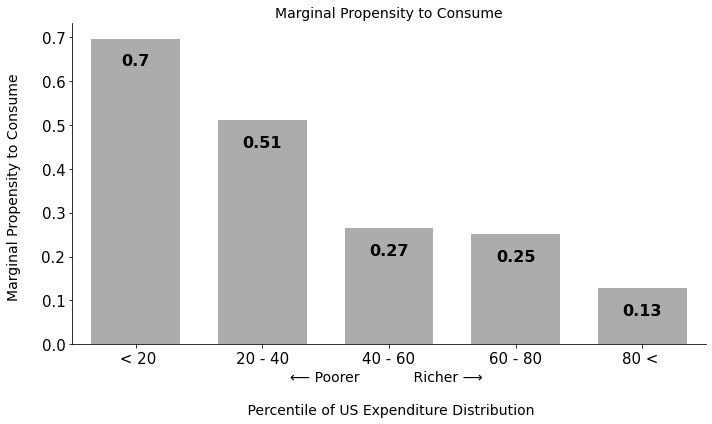

In [48]:
fig, ax = plt.subplots(figsize = [10.0,6.0], tight_layout = True)

hsr = ax.bar(grp.homeshare.median().index + 1, 
       (grp.mpc.mean()), alpha = 0.65, width = 0.70, color = "grey")

ax.bar_label(hsr, round(grp.mpc.mean(),2),
                  padding=-30, color='black', fontweight='bold', fontsize = 16)

ax.set_xlim(.5,5.5)



ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title('Marginal Propensity to Consume', fontsize=14)

ax.set_xlabel("⟵ Poorer            Richer ⟶ \n \n Percentile of US Expenditure Distribution", fontsize=14)
ax.set_ylabel("Marginal Propensity to Consume \n", fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=15)

ax.xaxis.set_ticks(np.arange(1, 5+1, 1.0))

ax.xaxis.set_ticklabels([" < 20", "20 - 40", "40 - 60", "60 - 80", "80 < "])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.xaxis.set_ticks(np.arange(1, 5+1, 1.0))

plt.savefig("../notes/figures/mpc.pdf", bbox_inches = "tight")

plt.show()